In [2]:
import glob
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import string

import re
import nltk
from nltk.corpus import stopwords
from nltk.stem import PorterStemmer
from nltk.tokenize import sent_tokenize, word_tokenize


In [3]:
# Mengambil semua file CSV dari folder 'ig/'
folder_path = 'ig/'
ig_csv_file = glob.glob(os.path.join(folder_path, "*.csv"))
data_ig = pd.concat([pd.read_csv(f) for f in ig_csv_file], ignore_index=True)


C:\Users\Nora\AppData\Local\Temp\ipykernel_6852\3598701806.py:4: DtypeWarning: Columns (103,105,106,107,108,110,111,112,117,140,142,143,144,145,147,148,149,150,152,153,154,155,157,158,159,160,162,163,164,165,167,168,169,170,172,173,174,175,177,178,179,184,207,209,210,211,212,214,215,216,217,219,220,221,222,224,225,226,231,249,251,252,253,254,256,257,258,259,261,262,263,264,266,267,268,273,291,293,294,295,296,298,299,300,301,303,304,305,308,309,310,315,333,335,336,337,338,340,341,342,343,345,346,347,348,350,351,352,353,355,356,357,358,360,361,362,363,365,366,367,372,390,392,393,394,395,397,398,399,400,402,403,404,409,422,424,425,426,431,444,446,447,448,449,451,452,453,458,471,473,474,475,476,478,479,480,481,483,484,485,486,488,489,490,494,499,504,506,507,508,513,518,519,521,522,523,524,526,527,528,529,531,532,533,534,536,537,538,539,541,542,543,544,546,547,548,550,551,552,557,562,564,565,566,571,576,578,579,580,585,590,591,593,594,595,597,598,599,604,609,611,612,613,618,623,625,626,627,

In [4]:
# Menampilkan informasi dasar tentang dataset
data_ig.head()
data_ig.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 13130 entries, 0 to 13129
Columns: 1157 entries, alt_imputed to paidPartnership
dtypes: float64(396), object(761)
memory usage: 115.9+ MB


In [5]:
# Memilih kolom-kolom tertentu
df_ig = data_ig[[
    'alt', 'caption', 'childPosts/1/alt',
    'childPosts/2/displayUrl', 'firstComment',
    # 'latestComments/0/text', 
    # 'latestComments/1/text', 'latestComments/2/text',
    # 'latestComments/3/text', 'latestComments/4/text', 'latestComments/5/text',
    # 'latestComments/6/text', 'latestComments/7/text', 'latestComments/8/text',
    # 'latestComments/9/text', 
    'timestamp', 'ownerUsername'
]]


In [6]:
df_ig.head(50)

,alt,caption,childPosts/1/alt,childPosts/2/displayUrl,firstComment,timestamp,ownerUsername
0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5,NaN,NaN,NaN,NaN,NaN,NaN,NaN
6,NaN,NaN,NaN,NaN,NaN,NaN,NaN
7,NaN,NaN,NaN,NaN,NaN,NaN,NaN
8,NaN,NaN,NaN,NaN,NaN,NaN,NaN
9,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [7]:
df_ig.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 13130 entries, 0 to 13129
Data columns (total 7 columns):
 #   Column                   Non-Null Count  Dtype 
---  ------                   --------------  ----- 
 0   alt                      6128 non-null   object
 1   caption                  8105 non-null   object
 2   childPosts/1/alt         2881 non-null   object
 3   childPosts/2/displayUrl  2109 non-null   object
 4   firstComment             3821 non-null   object
 5   timestamp                8430 non-null   object
 6   ownerUsername            8430 non-null   object
dtypes: object(7)
memory usage: 718.2+ KB


C:\Users\Nora\AppData\Local\Temp\ipykernel_6852\968869542.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_ig['timestamp'] = pd.to_datetime(df_ig['timestamp'], errors='coerce')
C:\Users\Nora\AppData\Local\Temp\ipykernel_6852\968869542.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_ig_cleaned['date'] = df_ig_cleaned['timestamp'].dt.date
C:\Users\Nora\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. C

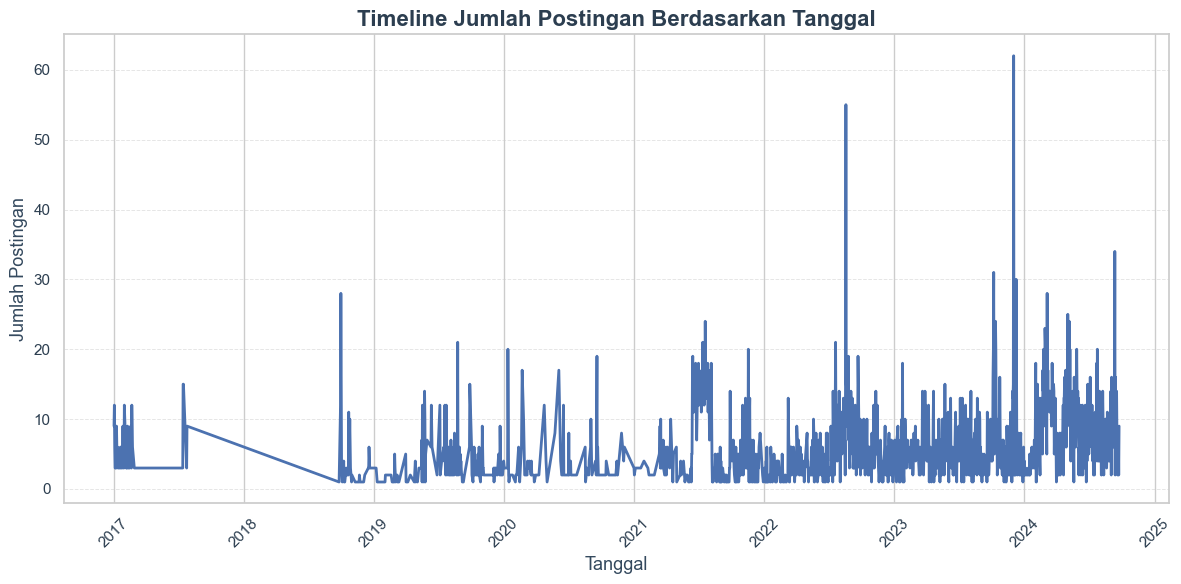

In [8]:
# Konversi kolom 'time' menjadi datetime
df_ig['timestamp'] = pd.to_datetime(df_ig['timestamp'], errors='coerce')
# Pastikan tidak ada nilai NaT (Not a Time) setelah konversi
df_ig_cleaned = df_ig.dropna(subset=['timestamp'])
# Ekstrak tanggal (tanpa jam) dari kolom 'time'
df_ig_cleaned['date'] = df_ig_cleaned['timestamp'].dt.date
# Grup data berdasarkan tanggal dan hitung jumlah postingan per tanggal
data_grouped_by_date = df_ig_cleaned.groupby('date').size().reset_index(name='jumlah_postingan')
# Set style untuk seaborn
sns.set(style="whitegrid")
# Visualisasi menggunakan line chart
plt.figure(figsize=(12, 6))
# Membuat lineplot tanpa marker untuk kesederhanaan
sns.lineplot(x='date', y='jumlah_postingan', data=data_grouped_by_date, color='b', linewidth=2)
# Menambahkan judul dan label sumbu
plt.title('Timeline Jumlah Postingan Berdasarkan Tanggal', fontsize=16, fontweight='bold', color='#2c3e50')
plt.xlabel('Tanggal', fontsize=13, fontweight='medium', color='#34495e')
plt.ylabel('Jumlah Postingan', fontsize=13, fontweight='medium', color='#34495e')
# Mengatur xticks untuk tidak terlalu padat
plt.xticks(rotation=45, fontsize=11, color='#2c3e50')
plt.yticks(fontsize=11, color='#2c3e50')
# Menambahkan grid yang lebih sederhana
plt.grid(axis='y', linestyle='--', linewidth=0.7, alpha=0.5)
# Menggunakan tight_layout untuk mengatur spasi layout
plt.tight_layout()
# Menampilkan grafik
plt.show()

In [9]:
# data_ig[df_ig.duplicated()]

In [10]:
# data_ig[data_ig.duplicated].shape

In [11]:
# df_no_duplicated = data_ig.drop_duplicates(keep='first')
# df_no_duplicated.head()

In [12]:
df_missing = df_ig.isnull().sum()
df_missing

alt                         7002
caption                     5025
childPosts/1/alt           10249
childPosts/2/displayUrl    11021
firstComment                9309
timestamp                   4700
ownerUsername               4700
dtype: int64

In [13]:
df_missing = pd.DataFrame({'missing_count': df_missing})

In [14]:
df_missing

,missing_count
alt,7002
caption,5025
childPosts/1/alt,10249
childPosts/2/displayUrl,11021
firstComment,9309
timestamp,4700
ownerUsername,4700


Text(0, 0.5, 'variabel')

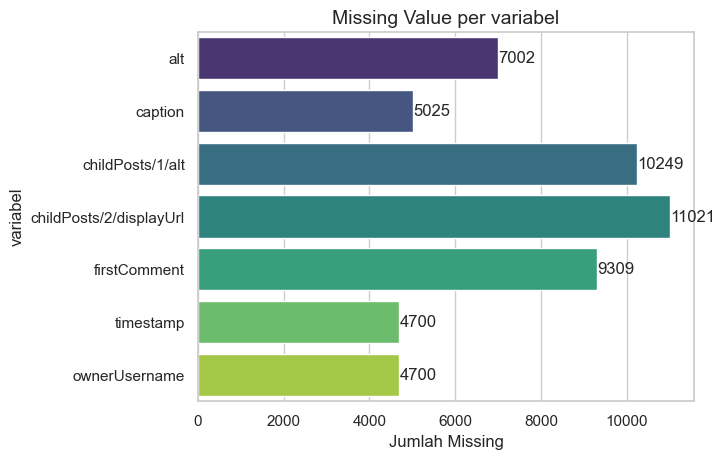

In [15]:
ax = sns.barplot(data=df_missing, x='missing_count', y=df_missing.index, palette='viridis')
for container in ax.containers:
    ax.bar_label(container, fmt='%d')
plt.title('Missing Value per variabel', fontsize=14)
plt.xlabel('Jumlah Missing')
plt.ylabel('variabel')



In [16]:
df_nan = df_ig.isna().sum()
df_nan

alt                         7002
caption                     5025
childPosts/1/alt           10249
childPosts/2/displayUrl    11021
firstComment                9309
timestamp                   4700
ownerUsername               4700
dtype: int64

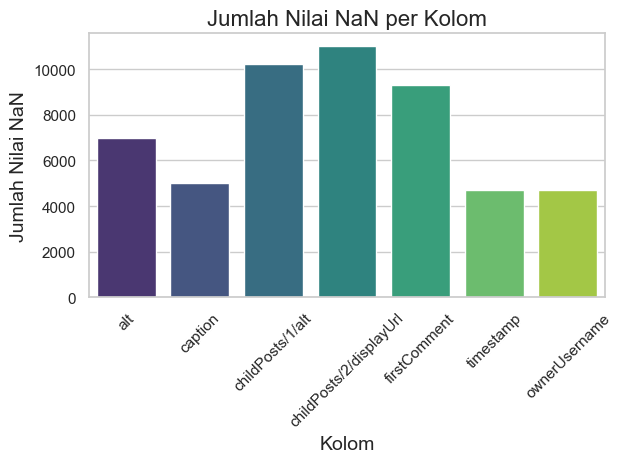

In [17]:
sns.barplot(x=df_nan.index, y=df_nan.values, palette='viridis')
# Tambahkan judul dan label
plt.title('Jumlah Nilai NaN per Kolom', fontsize=16)
plt.xlabel('Kolom', fontsize=14)
plt.ylabel('Jumlah Nilai NaN', fontsize=14)
# Rotasi label kolom jika diperlukan
plt.xticks(rotation=45)
# Tampilkan plot
plt.tight_layout()
plt.show()

In [29]:
# import missingno as msno

In [30]:
# msno.heatmap(df_ig)
# plt.title("Missing data Correlation Heatmap")
# plt.show()

In [ ]:
# df3 = df_ig_select.dropna(how='any')
# df3.shape

In [27]:
# df3.info()
df_ig.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 13130 entries, 0 to 13129
Data columns (total 7 columns):
 #   Column                   Non-Null Count  Dtype              
---  ------                   --------------  -----              
 0   alt                      6128 non-null   object             
 1   caption                  8105 non-null   object             
 2   childPosts/1/alt         2881 non-null   object             
 3   childPosts/2/displayUrl  2109 non-null   object             
 4   firstComment             3821 non-null   object             
 5   timestamp                8430 non-null   datetime64[ns, UTC]
 6   ownerUsername            8430 non-null   object             
dtypes: datetime64[ns, UTC](1), object(6)
memory usage: 718.2+ KB


In [34]:
mode_alt = df_ig['alt'].mode()[0]
mode_firstComment = df_ig['firstComment'].mode()[0]
mode_caption = df_ig['caption'].mode()[0]
# mode_latestComments0 = df_ig['latestComments/0/text'].mode()[0]
# mode_latestComments1 = df_ig['latestComments/1/text'].mode()[0]
# mode_latestComments2 = df_ig['latestComments/2/text'].mode()[0]
# mode_latestComments3 = df_ig['latestComments/3/text'].mode()[0]
# mode_latestComments4 = df_ig['latestComments/4/text'].mode()[0]
# mode_latestComments5 = df_ig['latestComments/5/text'].mode()[0]
# mode_latestComments6 = df_ig['latestComments/6/text'].mode()[0]
# mode_latestComments7 = df_ig['latestComments/7/text'].mode()[0]
# mode_latestComments8 = df_ig['latestComments/8/text'].mode()[0]
# mode_latestComments9 = df_ig['latestComments/9/text'].mode()[0]
mode_timeStamp = df_ig['timestamp'].mode()[0]
mode_owner = df_ig['ownerUsername'].mode()[0]

In [35]:
columns_to_impute = {
 'alt': 'alt_imputed',
 'caption': 'caption_imputed',
 'firstComment': 'firstComment_imputed',
 # 'latestComments/0/text': 'latestComments0_imputed',
 # 'latestComments/1/text': 'latestComments1_imputed',
 # 'latestComments/2/text': 'latestComments2_imputed',
 # 'latestComments/3/text': 'latestComments3_imputed',
 # 'latestComments/4/text': 'latestComments4_imputed',
 # 'latestComments/5/text': 'latestComments5_imputed',
 # 'latestComments/6/text': 'latestComments6_imputed',
 # 'latestComments/7/text': 'latestComments7_imputed',
 # 'latestComments/8/text': 'latestComments8_imputed',
 # 'latestComments/9/text': 'latestComments9_imputed',
 'timestamp' : 'times',
 'ownerUsername' : 'owner'
 
}
for col, new_col in columns_to_impute.items():
 mode_value = df_ig[col].mode()[0]
 df_ig[new_col] = df_ig[col].fillna(mode_value)
df_ig

C:\Users\Nora\AppData\Local\Temp\ipykernel_6852\141865062.py:21: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_ig[new_col] = df_ig[col].fillna(mode_value)
C:\Users\Nora\AppData\Local\Temp\ipykernel_6852\141865062.py:21: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_ig[new_col] = df_ig[col].fillna(mode_value)
C:\Users\Nora\AppData\Local\Temp\ipykernel_6852\141865062.py:21: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer]

,alt,caption,childPosts/1/alt,childPosts/2/displayUrl,firstComment,timestamp,ownerUsername,alt_imputed,caption_imputed,firstComment_imputed,times,owner
0,NaN,NaN,NaN,NaN,NaN,NaT,NaN,Photo by Dinas Pariwisata Lombok Utara in Dina...,[ FINALIS TERUNE DEDARE LOTIM 2023 ]\n\nHalo S...,🔥🔥🔥,2022-07-30 09:19:43+00:00,wonderfullomboksumbawa
1,NaN,NaN,NaN,NaN,NaN,NaT,NaN,Photo by Dinas Pariwisata Lombok Utara in Dina...,[ FINALIS TERUNE DEDARE LOTIM 2023 ]\n\nHalo S...,🔥🔥🔥,2022-07-30 09:19:43+00:00,wonderfullomboksumbawa
2,NaN,NaN,NaN,NaN,NaN,NaT,NaN,Photo by Dinas Pariwisata Lombok Utara in Dina...,[ FINALIS TERUNE DEDARE LOTIM 2023 ]\n\nHalo S...,🔥🔥🔥,2022-07-30 09:19:43+00:00,wonderfullomboksumbawa
3,NaN,NaN,NaN,NaN,NaN,NaT,NaN,Photo by Dinas Pariwisata Lombok Utara in Dina...,[ FINALIS TERUNE DEDARE LOTIM 2023 ]\n\nHalo S...,🔥🔥🔥,2022-07-30 09:19:43+00:00,wonderfullomboksumbawa
4,NaN,NaN,NaN,NaN,NaN,NaT,NaN,Photo by Dinas Pariwisata Lombok Utara in Dina...,[ FINALIS TERUNE DEDARE LOTIM 2023 ]\n\nHalo S...,🔥🔥🔥,2022-07-30 09:19:43+00:00,wonderfullomboksumbawa
...,...,...,...,...,...,...,...,...,...,...,...,...
13125,"Photo shared by Gili Islands on May 30, 2021 t...",#Repost @putriwithlove\n・・・\nEnjoying a beauti...,NaN,NaN,NaN,2021-05-30 23:41:49+00:00,thegiliway,"Photo shared by Gili Islands on May 30, 2021 t...",#Repost @putriwithlove\n・・・\nEnjoying a beauti...,🔥🔥🔥,2021-05-30 23:41:49+00:00,thegiliway
13126,"Photo shared by Gili Islands on May 30, 2021 t...",#Repost @pondoksantiestate\n・・・\nIt’s time for...,"Photo by Gili Islands on May 30, 2021.",https://instagram.fsti4-1.fna.fbcdn.net/v/t51....,@carissazerlinda honeymoon lagi ? Pulang bawa ...,2021-05-30 23:42:44+00:00,thegiliway,"Photo shared by Gili Islands on May 30, 2021 t...",#Repost @pondoksantiestate\n・・・\nIt’s time for...,@carissazerlinda honeymoon lagi ? Pulang bawa ...,2021-05-30 23:42:44+00:00,thegiliway
13127,"Photo shared by Gili Islands on June 01, 2021 ...",#Repost @steven.alexandre\n・・・\nSchooling West...,NaN,NaN,NaN,2021-06-02 02:22:09+00:00,thegiliway,"Photo shared by Gili Islands on June 01, 2021 ...",#Repost @steven.alexandre\n・・・\nSchooling West...,🔥🔥🔥,2021-06-02 02:22:09+00:00,thegiliway
13128,Photo by Gili Islands in Hotel Lumi Gili Trawa...,#Repost @hotellumi\n・・・\nLush green haven awai...,NaN,NaN,💚🌴🙌🏼😎,2021-06-10 01:56:38+00:00,thegiliway,Photo by Gili Islands in Hotel Lumi Gili Trawa...,#Repost @hotellumi\n・・・\nLush green haven awai...,💚🌴🙌🏼😎,2021-06-10 01:56:38+00:00,thegiliway


In [19]:
df_ig.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 13130 entries, 0 to 13129
Data columns (total 7 columns):
 #   Column                   Non-Null Count  Dtype              
---  ------                   --------------  -----              
 0   alt                      6128 non-null   object             
 1   caption                  8105 non-null   object             
 2   childPosts/1/alt         2881 non-null   object             
 3   childPosts/2/displayUrl  2109 non-null   object             
 4   firstComment             3821 non-null   object             
 5   timestamp                8430 non-null   datetime64[ns, UTC]
 6   ownerUsername            8430 non-null   object             
dtypes: datetime64[ns, UTC](1), object(6)
memory usage: 718.2+ KB


In [44]:
select_ig1 = df_ig[['alt_imputed','firstComment_imputed','caption_imputed','times','owner']]
select_ig2 = df_ig.iloc[:, 28:38]
data_no_missing = pd.concat([select_ig1, select_ig2], axis=1)
data_no_missing.head(2)

,alt_imputed,firstComment_imputed,caption_imputed,times,owner
0,Photo by Dinas Pariwisata Lombok Utara in Dina...,🔥🔥🔥,[ FINALIS TERUNE DEDARE LOTIM 2023 ]\n\nHalo S...,2022-07-30 09:19:43+00:00,wonderfullomboksumbawa
1,Photo by Dinas Pariwisata Lombok Utara in Dina...,🔥🔥🔥,[ FINALIS TERUNE DEDARE LOTIM 2023 ]\n\nHalo S...,2022-07-30 09:19:43+00:00,wonderfullomboksumbawa


In [45]:
data_no_missing = data_no_missing.isnull().sum()
data_no_missing

alt_imputed             0
firstComment_imputed    0
caption_imputed         0
times                   0
owner                   0
dtype: int64

In [46]:
df1 = pd.concat([select_ig1, select_ig2], axis=1)
df1[df1.duplicated()]

,alt_imputed,firstComment_imputed,caption_imputed,times,owner
1,Photo by Dinas Pariwisata Lombok Utara in Dina...,🔥🔥🔥,[ FINALIS TERUNE DEDARE LOTIM 2023 ]\n\nHalo S...,2022-07-30 09:19:43+00:00,wonderfullomboksumbawa
2,Photo by Dinas Pariwisata Lombok Utara in Dina...,🔥🔥🔥,[ FINALIS TERUNE DEDARE LOTIM 2023 ]\n\nHalo S...,2022-07-30 09:19:43+00:00,wonderfullomboksumbawa
3,Photo by Dinas Pariwisata Lombok Utara in Dina...,🔥🔥🔥,[ FINALIS TERUNE DEDARE LOTIM 2023 ]\n\nHalo S...,2022-07-30 09:19:43+00:00,wonderfullomboksumbawa
4,Photo by Dinas Pariwisata Lombok Utara in Dina...,🔥🔥🔥,[ FINALIS TERUNE DEDARE LOTIM 2023 ]\n\nHalo S...,2022-07-30 09:19:43+00:00,wonderfullomboksumbawa
5,Photo by Dinas Pariwisata Lombok Utara in Dina...,🔥🔥🔥,[ FINALIS TERUNE DEDARE LOTIM 2023 ]\n\nHalo S...,2022-07-30 09:19:43+00:00,wonderfullomboksumbawa
...,...,...,...,...,...
12972,Photo shared by Dinas Pariwisata Provinsi NTB ...,Masih melekat logonya Lombok friendly dibandin...,📣Datang dan ramaikan📣\n\n“Pesona Khazanah Rama...,2023-03-24 00:49:39+00:00,lomboksumbawa.go
12973,Photo shared by Dinas Pariwisata Provinsi NTB ...,🔥🔥🔥,#Sobatwisata Tahu Nggak?? \n\nAda berbagai mac...,2023-03-20 00:46:01+00:00,lomboksumbawa.go
12974,Photo by Dinas Pariwisata Lombok Utara in Dina...,🔥🔥🔥,@travelerbaperrrrrrrrr \n•••\nMy life is very ...,2023-03-17 01:57:48+00:00,lomboksumbawa.go
12988,Photo shared by Dinas Pariwisata Provinsi NTB ...,@labuhanlombokcup2022_,"Hallo #Sob\nWah gak terasa, sudah pengumuman 7...",2023-03-22 00:50:00+00:00,lomboksumbawa.go


In [47]:
df1

,alt_imputed,firstComment_imputed,caption_imputed,times,owner
0,Photo by Dinas Pariwisata Lombok Utara in Dina...,🔥🔥🔥,[ FINALIS TERUNE DEDARE LOTIM 2023 ]\n\nHalo S...,2022-07-30 09:19:43+00:00,wonderfullomboksumbawa
1,Photo by Dinas Pariwisata Lombok Utara in Dina...,🔥🔥🔥,[ FINALIS TERUNE DEDARE LOTIM 2023 ]\n\nHalo S...,2022-07-30 09:19:43+00:00,wonderfullomboksumbawa
2,Photo by Dinas Pariwisata Lombok Utara in Dina...,🔥🔥🔥,[ FINALIS TERUNE DEDARE LOTIM 2023 ]\n\nHalo S...,2022-07-30 09:19:43+00:00,wonderfullomboksumbawa
3,Photo by Dinas Pariwisata Lombok Utara in Dina...,🔥🔥🔥,[ FINALIS TERUNE DEDARE LOTIM 2023 ]\n\nHalo S...,2022-07-30 09:19:43+00:00,wonderfullomboksumbawa
4,Photo by Dinas Pariwisata Lombok Utara in Dina...,🔥🔥🔥,[ FINALIS TERUNE DEDARE LOTIM 2023 ]\n\nHalo S...,2022-07-30 09:19:43+00:00,wonderfullomboksumbawa
...,...,...,...,...,...
13125,"Photo shared by Gili Islands on May 30, 2021 t...",🔥🔥🔥,#Repost @putriwithlove\n・・・\nEnjoying a beauti...,2021-05-30 23:41:49+00:00,thegiliway
13126,"Photo shared by Gili Islands on May 30, 2021 t...",@carissazerlinda honeymoon lagi ? Pulang bawa ...,#Repost @pondoksantiestate\n・・・\nIt’s time for...,2021-05-30 23:42:44+00:00,thegiliway
13127,"Photo shared by Gili Islands on June 01, 2021 ...",🔥🔥🔥,#Repost @steven.alexandre\n・・・\nSchooling West...,2021-06-02 02:22:09+00:00,thegiliway
13128,Photo by Gili Islands in Hotel Lumi Gili Trawa...,💚🌴🙌🏼😎,#Repost @hotellumi\n・・・\nLush green haven awai...,2021-06-10 01:56:38+00:00,thegiliway


In [48]:
df1[df1.duplicated].shape

(8438, 5)

In [51]:
df2 = df1.drop_duplicates(keep='first')
df2.head

<bound method NDFrame.head of                                              alt_imputed  \
0      Photo by Dinas Pariwisata Lombok Utara in Dina...   
4692   Photo by Dinas Pariwisata Lombok Utara in Dina...   
4693   Photo by Go Mandalika in Sukarare Lombok Tenga...   
4694   Photo by Dinas Pariwisata Lombok Utara in Dina...   
4695   Photo by Dinas Pariwisata Lombok Utara in Dina...   
...                                                  ...   
13125  Photo shared by Gili Islands on May 30, 2021 t...   
13126  Photo shared by Gili Islands on May 30, 2021 t...   
13127  Photo shared by Gili Islands on June 01, 2021 ...   
13128  Photo by Gili Islands in Hotel Lumi Gili Trawa...   
13129  Photo shared by Gili Islands on June 12, 2021 ...   

                                    firstComment_imputed  \
0                                                    🔥🔥🔥   
4692                           bang ini parkirnya dimana   
4693                                                 🔥🔥🔥   
4694     

In [52]:
df2.isnull().sum()

alt_imputed             0
firstComment_imputed    0
caption_imputed         0
times                   0
owner                   0
dtype: int64

In [53]:
df3 = df2.dropna(how='any')
df3.head()

,alt_imputed,firstComment_imputed,caption_imputed,times,owner
0,Photo by Dinas Pariwisata Lombok Utara in Dina...,🔥🔥🔥,[ FINALIS TERUNE DEDARE LOTIM 2023 ]\n\nHalo S...,2022-07-30 09:19:43+00:00,wonderfullomboksumbawa
4692,Photo by Dinas Pariwisata Lombok Utara in Dina...,bang ini parkirnya dimana,Sahabat wajib coba sih. Karna dari bandara lom...,2024-06-29 23:28:09+00:00,lampaqlampaq
4693,Photo by Go Mandalika in Sukarare Lombok Tenga...,🔥🔥🔥,Ladies and Gentlemen\nTipak Sanak Saudara Sena...,2024-07-24 07:01:26+00:00,gomandalika
4694,Photo by Dinas Pariwisata Lombok Utara in Dina...,🔥🔥🔥,"Car Free Night\n""PRAYA CITY POP""\n.\n.\n#cfn #...",2024-07-07 12:14:11+00:00,cathaproject.id
4695,Photo by Dinas Pariwisata Lombok Utara in Dina...,💚,Pelatihan Pemandu Ekowisata 27-29 Juni 2024 te...,2024-06-29 10:00:39+00:00,gomandalika


In [54]:
df3['owner'].unique()

array(['wonderfullomboksumbawa', 'lampaqlampaq', 'gomandalika',
       'cathaproject.id', 'travbuck_id', 'bidangkebudayaanlomboktengah',
       'danaubiru_lomboktengah', 'pathulbahri459', 'desa_wisataaikberik',
       'kpknlmataram', 'themandalika_lombok', 'abdillah_yahya_alhabsyi',
       'bppdntb', 'lomboksumbawa.go', 'putrimandalika_ntb',
       'lombokfriendly', 'intfestival.nusantara', 'berita_mandalika',
       'pkl_dispar_uinma_2023', 'desa_wisata_lantan', 'fadilrahmawan',
       'senggigi.sunset.jazz', 'pariwisata.lombokbarat',
       'lombokutara.tourism', 'dispar_mataram', 'festivalfilmsangkareang',
       'desawisatabonjeruk', 'start1nc', 'poltekparlombok',
       'disparlomboktimur', 'alunanbudaya.fest', 'karismaeventnusantara',
       'dbs_dive1', 'dvn_event', 'terunededarelotim', 'mustafabisri',
       'biroadpimntb', 'hassanudin.id', 'merumatta.senggigilombok',
       'sumkm.ntb', 'desawisatabayan_', 'genpi.poltekparlombok',
       'poltekpar_nhi', 'sfriszly', 'destinasi

In [57]:
valid_accounts = [
 'disparlomboktimur', 'gomandalika', 'pariwisata.lombokbarat', 'dispar_mataram',
 'lombokutara.tourism', 'wonderfullomboksumbawa', 'poltekparlombok',
 'lomboksumbawa.go', 'InfoRinjani', 'pearloftrawangan', 'thegiliway'
]
def map_accounts(username):
 if username in valid_accounts:
 return username
 else:
 return 'lainnya'
df3['owner'] = df3['owner'].apply(map_accounts)

In [56]:
print(df3['owner'].value_counts())

owner
pariwisata.lombokbarat     567
pearloftrawangan           546
inforinjani                461
lomboksumbawa.go           427
poltekparlombok            399
                          ... 
indonesiainmelbourne         1
mappala.poltekparlombok      1
timuradventour               1
themandalikagp               1
angelinasondakh09            1
Name: count, Length: 151, dtype: int64


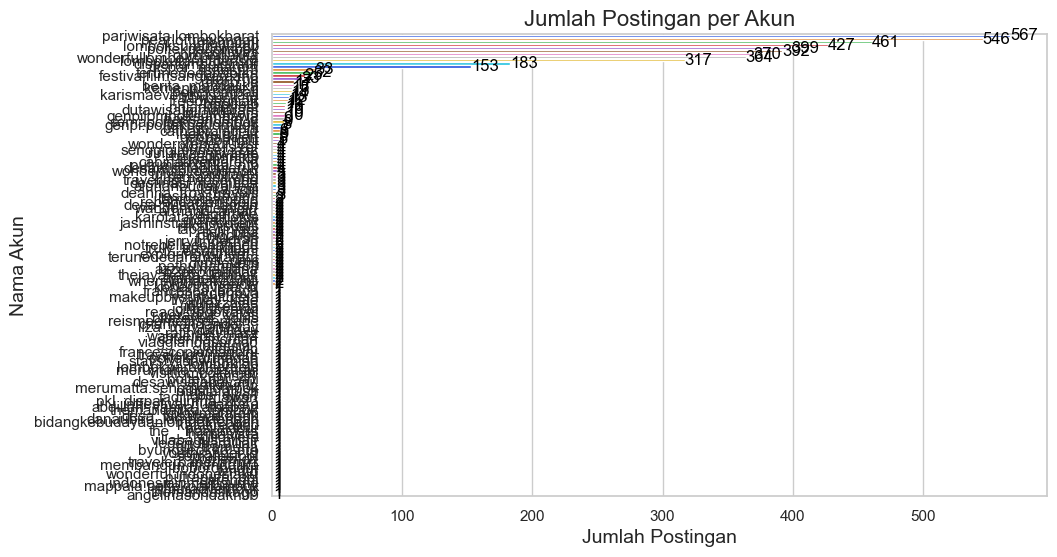

In [63]:
# Menghitung jumlah postingan per akun
owner_counts = df3['owner'].value_counts().reset_index()
owner_counts.columns = ['ownerUsername', 'count'] # Mengubah nama kolom untuk kemudahan
# Visualisasi dengan seaborn
plt.figure(figsize=(10, 6)) # Mengatur ukuran grafik
sns.barplot(data=owner_counts, x='count', y='ownerUsername', palette='bright')
# Menambahkan judul dan label
plt.title('Jumlah Postingan per Akun', fontsize=16)
plt.xlabel('Jumlah Postingan', fontsize=14)
plt.ylabel('Nama Akun', fontsize=14)
# Menampilkan jumlah postingan di setiap batang
for index, value in enumerate(owner_counts['count']):
 plt.text(value, index, str(value), color='black', ha='left', va='center', fontsize=12)
# Menampilkan grafik
plt.show()

In [60]:
df3.info()

<class 'pandas.core.frame.DataFrame'>
Index: 4692 entries, 0 to 13129
Data columns (total 5 columns):
 #   Column                Non-Null Count  Dtype              
---  ------                --------------  -----              
 0   alt_imputed           4692 non-null   object             
 1   firstComment_imputed  4692 non-null   object             
 2   caption_imputed       4692 non-null   object             
 3   times                 4692 non-null   datetime64[ns, UTC]
 4   owner                 4692 non-null   object             
dtypes: datetime64[ns, UTC](1), object(4)
memory usage: 219.9+ KB


In [64]:
df3.dtypes

alt_imputed                          object
firstComment_imputed                 object
caption_imputed                      object
times                   datetime64[ns, UTC]
owner                                object
dtype: object

In [65]:
df3['postingan'] = df3['caption_imputed'].astype(str)
df3.dtypes

alt_imputed                          object
firstComment_imputed                 object
caption_imputed                      object
times                   datetime64[ns, UTC]
owner                                object
postingan                            object
dtype: object

In [66]:
def get_wordCount(text):
 return len(text.split())
df3['word_count'] = df3['postingan'].apply(lambda x: get_wordCount(x))
df3

,alt_imputed,firstComment_imputed,caption_imputed,times,owner,postingan,word_count
0,Photo by Dinas Pariwisata Lombok Utara in Dina...,🔥🔥🔥,[ FINALIS TERUNE DEDARE LOTIM 2023 ]\n\nHalo S...,2022-07-30 09:19:43+00:00,wonderfullomboksumbawa,[ FINALIS TERUNE DEDARE LOTIM 2023 ]\n\nHalo S...,82
4692,Photo by Dinas Pariwisata Lombok Utara in Dina...,bang ini parkirnya dimana,Sahabat wajib coba sih. Karna dari bandara lom...,2024-06-29 23:28:09+00:00,lampaqlampaq,Sahabat wajib coba sih. Karna dari bandara lom...,95
4693,Photo by Go Mandalika in Sukarare Lombok Tenga...,🔥🔥🔥,Ladies and Gentlemen\nTipak Sanak Saudara Sena...,2024-07-24 07:01:26+00:00,gomandalika,Ladies and Gentlemen\nTipak Sanak Saudara Sena...,154
4694,Photo by Dinas Pariwisata Lombok Utara in Dina...,🔥🔥🔥,"Car Free Night\n""PRAYA CITY POP""\n.\n.\n#cfn #...",2024-07-07 12:14:11+00:00,cathaproject.id,"Car Free Night\n""PRAYA CITY POP""\n.\n.\n#cfn #...",12
4695,Photo by Dinas Pariwisata Lombok Utara in Dina...,💚,Pelatihan Pemandu Ekowisata 27-29 Juni 2024 te...,2024-06-29 10:00:39+00:00,gomandalika,Pelatihan Pemandu Ekowisata 27-29 Juni 2024 te...,16
...,...,...,...,...,...,...,...
13125,"Photo shared by Gili Islands on May 30, 2021 t...",🔥🔥🔥,#Repost @putriwithlove\n・・・\nEnjoying a beauti...,2021-05-30 23:41:49+00:00,thegiliway,#Repost @putriwithlove\n・・・\nEnjoying a beauti...,27
13126,"Photo shared by Gili Islands on May 30, 2021 t...",@carissazerlinda honeymoon lagi ? Pulang bawa ...,#Repost @pondoksantiestate\n・・・\nIt’s time for...,2021-05-30 23:42:44+00:00,thegiliway,#Repost @pondoksantiestate\n・・・\nIt’s time for...,276
13127,"Photo shared by Gili Islands on June 01, 2021 ...",🔥🔥🔥,#Repost @steven.alexandre\n・・・\nSchooling West...,2021-06-02 02:22:09+00:00,thegiliway,#Repost @steven.alexandre\n・・・\nSchooling West...,90
13128,Photo by Gili Islands in Hotel Lumi Gili Trawa...,💚🌴🙌🏼😎,#Repost @hotellumi\n・・・\nLush green haven awai...,2021-06-10 01:56:38+00:00,thegiliway,#Repost @hotellumi\n・・・\nLush green haven awai...,62


In [67]:
total_mumber = df3['word_count'].sum()
print(total_mumber)

323919


In [68]:
avg_word_count = df3['word_count'].mean()
print('Average number of words = ', round(avg_word_count, 2))

Average number of words =  69.04


In [83]:
# total_char = df3['char_length'].sum()
# print('Total character', total_char)
# avg_char_count = df3['char_length'].mean()
# print(avg_char_count)

<Axes: ylabel='Density'>

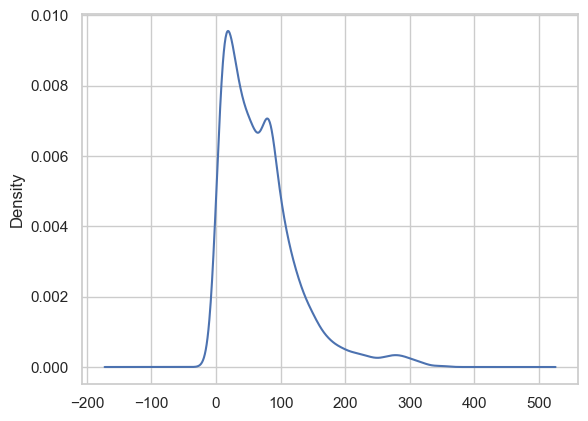

In [70]:
df3.word_count.plot(kind='kde')

<Axes: ylabel='Frequency'>

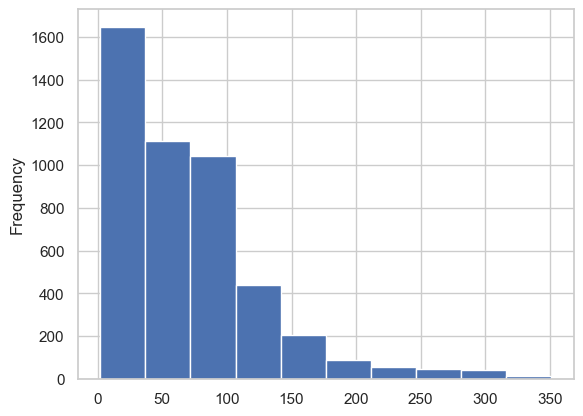

In [71]:
df3.word_count.plot(kind='hist')

<Axes: >

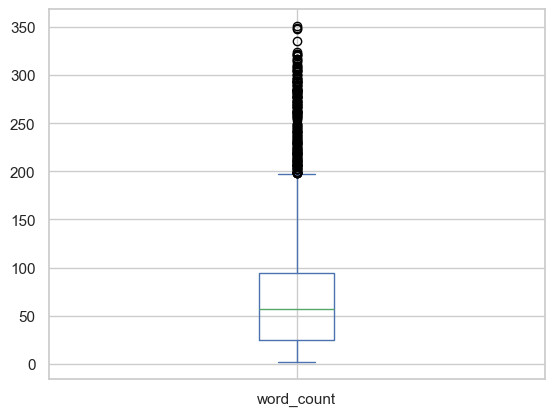

In [72]:
df3.word_count.plot(kind='box')

In [75]:
def get_char_count(text):
 return len(text)
df3['char_length'] = df3['postingan'].apply(lambda x: get_char_count(x))

<Axes: ylabel='Density'>

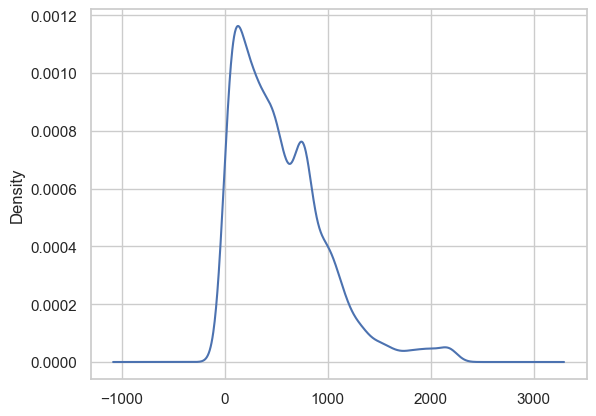

In [76]:
df3.char_length.plot(kind='kde')

<Axes: ylabel='Frequency'>

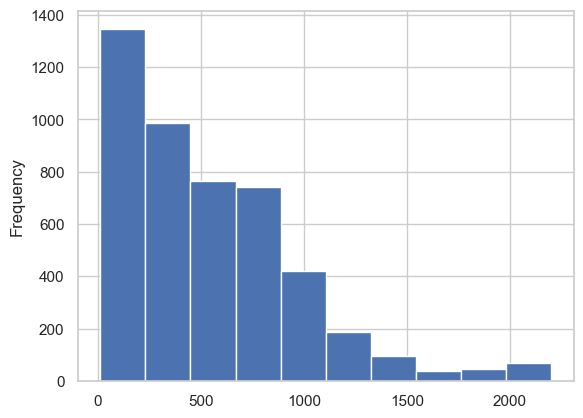

In [77]:
df3.char_length.plot(kind='hist')

<Axes: >

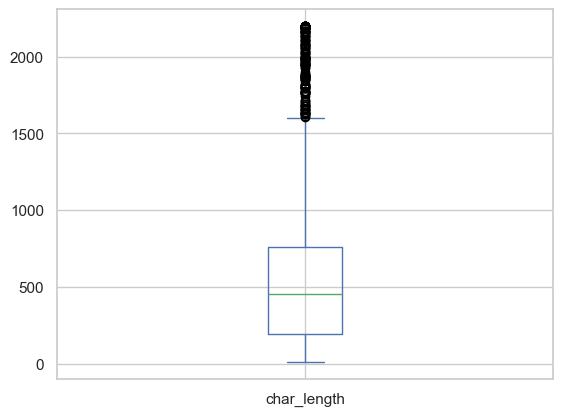

In [78]:
df3.char_length.plot(kind='box')

In [79]:
data_ig

,alt_imputed,firstComment_imputed,caption_imputed,times,owner,postingan,word_count,char_length,alt,caption,...,latestComments/8/replies/0/ownerProfilePicUrl,latestComments/8/replies/0/ownerUsername,latestComments/8/replies/0/text,latestComments/8/replies/0/timestamp,mentions/18,mentions/19,mentions/20,mentions/21,mentions/22,paidPartnership
0,Photo by Dinas Pariwisata Lombok Utara in Dina...,bang ini parkirnya dimana,Sahabat wajib coba sih. Karna dari bandara lom...,2024-06-29 23:28:09+00:00,lainnya,Sahabat wajib coba sih. Karna dari bandara lom...,95.0,551.0,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,Photo by Go Mandalika in Sukarare Lombok Tenga...,🔥🔥🔥,Ladies and Gentlemen\nTipak Sanak Saudara Sena...,2024-07-24 07:01:26+00:00,gomandalika,Ladies and Gentlemen\nTipak Sanak Saudara Sena...,154.0,1245.0,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,Photo by Dinas Pariwisata Lombok Utara in Dina...,🔥🔥🔥,"Car Free Night\n""PRAYA CITY POP""\n.\n.\n#cfn #...",2024-07-07 12:14:11+00:00,lainnya,"Car Free Night\n""PRAYA CITY POP""\n.\n.\n#cfn #...",12.0,75.0,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,Photo by Dinas Pariwisata Lombok Utara in Dina...,💚,Pelatihan Pemandu Ekowisata 27-29 Juni 2024 te...,2024-06-29 10:00:39+00:00,gomandalika,Pelatihan Pemandu Ekowisata 27-29 Juni 2024 te...,16.0,143.0,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,Photo by Dinas Pariwisata Lombok Utara in Dina...,🔥🔥🔥,Di Lombok banyak tempat wisata yang bisa kalia...,2024-06-24 07:24:43+00:00,lainnya,Di Lombok banyak tempat wisata yang bisa kalia...,53.0,399.0,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
13125,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,"Photo shared by Gili Islands on May 30, 2021 t...",#Repost @putriwithlove\n・・・\nEnjoying a beauti...,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
13126,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,"Photo shared by Gili Islands on May 30, 2021 t...",#Repost @pondoksantiestate\n・・・\nIt’s time for...,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
13127,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,"Photo shared by Gili Islands on June 01, 2021 ...",#Repost @steven.alexandre\n・・・\nSchooling West...,...,NaN,NaN,NaN,NaN,explorelombok,divermag,sonyindonesia,isotta_underwater_housings,scubadiverid,NaN
13128,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Photo by Gili Islands in Hotel Lumi Gili Trawa...,#Repost @hotellumi\n・・・\nLush green haven awai...,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [80]:
data_ig_selected = df3

In [81]:
data_ig_selected

,alt_imputed,firstComment_imputed,caption_imputed,times,owner,postingan,word_count,char_length
0,Photo by Dinas Pariwisata Lombok Utara in Dina...,🔥🔥🔥,[ FINALIS TERUNE DEDARE LOTIM 2023 ]\n\nHalo S...,2022-07-30 09:19:43+00:00,wonderfullomboksumbawa,[ FINALIS TERUNE DEDARE LOTIM 2023 ]\n\nHalo S...,82,758
4692,Photo by Dinas Pariwisata Lombok Utara in Dina...,bang ini parkirnya dimana,Sahabat wajib coba sih. Karna dari bandara lom...,2024-06-29 23:28:09+00:00,lampaqlampaq,Sahabat wajib coba sih. Karna dari bandara lom...,95,551
4693,Photo by Go Mandalika in Sukarare Lombok Tenga...,🔥🔥🔥,Ladies and Gentlemen\nTipak Sanak Saudara Sena...,2024-07-24 07:01:26+00:00,gomandalika,Ladies and Gentlemen\nTipak Sanak Saudara Sena...,154,1245
4694,Photo by Dinas Pariwisata Lombok Utara in Dina...,🔥🔥🔥,"Car Free Night\n""PRAYA CITY POP""\n.\n.\n#cfn #...",2024-07-07 12:14:11+00:00,cathaproject.id,"Car Free Night\n""PRAYA CITY POP""\n.\n.\n#cfn #...",12,75
4695,Photo by Dinas Pariwisata Lombok Utara in Dina...,💚,Pelatihan Pemandu Ekowisata 27-29 Juni 2024 te...,2024-06-29 10:00:39+00:00,gomandalika,Pelatihan Pemandu Ekowisata 27-29 Juni 2024 te...,16,143
...,...,...,...,...,...,...,...,...
13125,"Photo shared by Gili Islands on May 30, 2021 t...",🔥🔥🔥,#Repost @putriwithlove\n・・・\nEnjoying a beauti...,2021-05-30 23:41:49+00:00,thegiliway,#Repost @putriwithlove\n・・・\nEnjoying a beauti...,27,301
13126,"Photo shared by Gili Islands on May 30, 2021 t...",@carissazerlinda honeymoon lagi ? Pulang bawa ...,#Repost @pondoksantiestate\n・・・\nIt’s time for...,2021-05-30 23:42:44+00:00,thegiliway,#Repost @pondoksantiestate\n・・・\nIt’s time for...,276,1810
13127,"Photo shared by Gili Islands on June 01, 2021 ...",🔥🔥🔥,#Repost @steven.alexandre\n・・・\nSchooling West...,2021-06-02 02:22:09+00:00,thegiliway,#Repost @steven.alexandre\n・・・\nSchooling West...,90,1045
13128,Photo by Gili Islands in Hotel Lumi Gili Trawa...,💚🌴🙌🏼😎,#Repost @hotellumi\n・・・\nLush green haven awai...,2021-06-10 01:56:38+00:00,thegiliway,#Repost @hotellumi\n・・・\nLush green haven awai...,62,452


In [82]:
file_name = 'datasets_instagram.csv'
data_ig_selected.to_csv(file_name, index=False)
print(f"File '{file_name}' telah berhasil di Simpan.!")

File 'datasets_instagram.csv' telah berhasil di Simpan.!
